# Homework 1 – Initiation

## Tasks
1. Import provided `customers.xls` dataset to a pandas dataframe.
* Derive for all non-numeric columns one numeric feature.
* Standardize columns `age`, `est_income` and `local`.
* Derive five features by applying a PCA. Which of the original features has the highest correlation with one of the five derived features (principal components)?

### Task 1 - Import Data as Panda

In [32]:
import pandas as pd

df = pd.read_excel('./data/customers.xls')

Get some insight into the data

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2070 entries, 0 to 2069
Data columns (total 17 columns):
ID                      2070 non-null int64
Sex                     2070 non-null object
Status                  2070 non-null object
Children                2070 non-null int64
Est_Income              2070 non-null float64
Car_Owner               2070 non-null object
Usage                   2070 non-null float64
Age                     2070 non-null float64
RatePlan                2070 non-null int64
LongDistance            2070 non-null float64
International           2070 non-null float64
Local                   2070 non-null float64
Dropped                 2070 non-null int64
Paymethod               2070 non-null object
LocalBilltype           2070 non-null object
LongDistanceBilltype    2070 non-null object
CHURN                   2070 non-null object
dtypes: float64(6), int64(4), object(7)
memory usage: 275.0+ KB


In [34]:
df.head()

,ID,Sex,Status,Children,Est_Income,Car_Owner,Usage,Age,RatePlan,LongDistance,International,Local,Dropped,Paymethod,LocalBilltype,LongDistanceBilltype,CHURN
0,1,F,S,1,38000.00,N,229.64,24.393333,3,23.56,0.0,206.08,0,CC,Budget,Intnl_discount,Cancelled
1,6,M,M,2,29616.00,N,75.29,49.426667,2,29.78,0.0,45.50,0,CH,FreeLocal,Standard,Current
2,8,M,M,0,19732.80,N,47.25,50.673333,3,24.81,0.0,22.44,0,CC,FreeLocal,Standard,Current
3,11,M,S,2,96.33,N,59.01,56.473333,1,26.13,0.0,32.88,1,CC,Budget,Standard,Current
4,14,F,M,2,52004.80,N,28.14,25.140000,1,5.03,0.0,23.11,0,CH,Budget,Intnl_discount,Cancelled


In [35]:
df.describe()

,ID,Children,Est_Income,Usage,Age,RatePlan,LongDistance,International,Local,Dropped
count,2070.000000,2070.000000,2070.000000,2070.000000,2070.000000,2070.000000,2070.000000,2070.000000,2070.000000,2070.000000
mean,1901.151691,1.147826,51464.262406,75.855063,42.798081,2.509662,16.129338,1.207295,59.080812,0.135749
std,1094.709118,0.843124,30796.680570,59.741635,14.883739,1.125157,9.866626,2.625421,57.542526,0.526189
min,1.000000,0.000000,96.330000,0.680000,12.326667,1.000000,0.000000,0.000000,0.680000,0.000000
25%,972.250000,0.000000,21084.700000,34.250000,30.886667,2.000000,8.090000,0.000000,15.200000,0.000000
50%,1874.000000,1.000000,55860.000000,57.110000,45.526667,2.000000,16.140000,0.000000,39.620000,0.000000
75%,2832.000000,2.000000,78000.000000,107.020000,54.013333,4.000000,22.990000,0.000000,87.460000,0.000000
max,3825.000000,2.000000,120000.000000,361.880000,77.000000,4.000000,59.000000,9.700000,332.460000,4.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002638AA10BE0>,
      dtype=object)

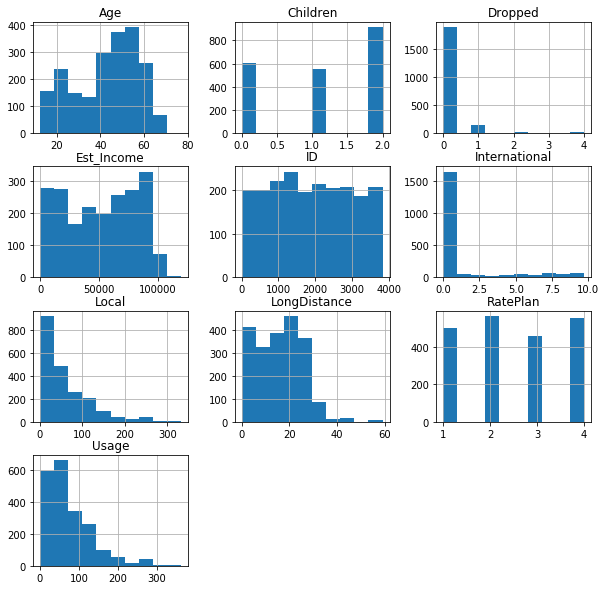

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
df.hist(figsize = (10,10))

### Task2 - Deriving Numeric Features

At the first, I have to look up the distinct values for each non numeric feature

In [37]:
print("Distinct Values of Sex: ") 
print(df.Sex.unique())

Distinct Values of Sex: 
['F' 'M']


In [38]:
print("Distinct Values of Status: ")
print(df.Status.unique())     

Distinct Values of Status: 
['S' 'M' 'D']


In [39]:
print("Distinct Values of Car_Owner: ")
print(df.Car_Owner.unique())

Distinct Values of Car_Owner: 
['N' 'Y']


In [40]:
print("Distinct Values of Paymethod: ")
print(df.Paymethod.unique())

Distinct Values of Paymethod: 
['CC' 'CH' 'Auto']


In [41]:
print("Distinct Values of LocalBilltype: ")
print(df.LocalBilltype.unique().size)

Distinct Values of LocalBilltype: 
2


In [42]:
print("Distinct Values of LongDistanceBilltype: ")
print(df.LongDistanceBilltype.unique())

Distinct Values of LongDistanceBilltype: 
['Intnl_discount' 'Standard']


In [43]:
print("Distinct Values of CHURN: ")
print(df.CHURN.unique())

Distinct Values of CHURN: 
['Cancelled' 'Current']


Now I can map the categorial attributes to a numerical discrete value for each feature:

In [44]:
#Mapping sex
import numpy as np
df.Sex.replace(df.Sex.unique(),np.arange(0,df.Sex.unique().size,1), inplace = True)

In [45]:
#Mapping Status
df.Status.replace(('S','M','D'),(0,1,2), inplace = True)

In [46]:
#Mapping Car_Owner
df.Car_Owner.replace(('N','Y'),(0,1), inplace = True)
   

In [47]:
#Mapping Paymethod
df.Paymethod.replace(('CC','CH','Auto'),(0,1,2), inplace = True)
    

In [48]:
#Mapping LocalBilltype
df.LocalBilltype.replace(('Budget','FreeLocal'),(0,1), inplace = True)
  

In [49]:
#Mapping LongDistanceBilltype
df.LongDistanceBilltype.replace(('Intnl_discount','Standard'),(0,1), inplace = True)
    

In [50]:
#Mapping CHURN
df.CHURN.replace(('Cancelled','Current'),(0,1), inplace = True)
    

In [51]:
#Check whether anything went wrong
df.head()

,ID,Sex,Status,Children,Est_Income,Car_Owner,Usage,Age,RatePlan,LongDistance,International,Local,Dropped,Paymethod,LocalBilltype,LongDistanceBilltype,CHURN
0,1,0,0,1,38000.00,0,229.64,24.393333,3,23.56,0.0,206.08,0,0,0,0,0
1,6,1,1,2,29616.00,0,75.29,49.426667,2,29.78,0.0,45.50,0,1,1,1,1
2,8,1,1,0,19732.80,0,47.25,50.673333,3,24.81,0.0,22.44,0,0,1,1,1
3,11,1,0,2,96.33,0,59.01,56.473333,1,26.13,0.0,32.88,1,0,0,1,1
4,14,0,1,2,52004.80,0,28.14,25.140000,1,5.03,0.0,23.11,0,1,0,0,0


All former non-numeric features are transformed into numeric features.

### Task 3 - Standardization 

In [57]:
#Import StandardScaler
from sklearn.preprocessing import StandardScaler

#initialiazing
stand = StandardScaler()

#standardizing income, age and local
income = df.iloc[:,[4]]
age = df.iloc[:,[7]]
local = df.iloc[:,[-6]]

income_s = stand.fit_transform(income)
age_s = stand.fit_transform(age)
local_s = stand.fit_transform(local)

df_s = df.iloc[:,:]
df_s['Est_Income'] = pd.DataFrame(income_s)
df_s['Age'] = pd.DataFrame(age_s)
df_s['Local'] = pd.DataFrame(local_s)
df_s.head()

,ID,Sex,Status,Children,Est_Income,Car_Owner,Usage,Age,RatePlan,LongDistance,International,Local,Dropped,Paymethod,LocalBilltype,LongDistanceBilltype,CHURN
0,1,-0.753778,-1.207880,-0.175374,-0.437304,-0.736528,2.574789,-1.236866,0.435901,0.753293,-0.459959,2.555236,-0.258047,-0.757193,-0.912063,-1.496475,-1.254841
1,6,1.326650,0.745489,1.010978,-0.709607,-0.736528,-0.009461,0.445465,-0.453079,1.383853,-0.459959,-0.236071,-0.258047,0.462565,1.096416,0.668237,0.796913
2,8,1.326650,0.745489,-1.361726,-1.030602,-0.736528,-0.478929,0.529246,0.435901,0.880013,-0.459959,-0.636914,-0.258047,-0.757193,1.096416,0.668237,0.796913
3,11,1.326650,-1.207880,1.010978,-1.668373,-0.736528,-0.282033,0.919027,-1.342059,1.013830,-0.459959,-0.455440,1.642869,-0.757193,-0.912063,0.668237,0.796913
4,14,-0.753778,0.745489,1.010978,0.017556,-0.736528,-0.798883,-1.186687,-1.342059,-1.125209,-0.459959,-0.625268,-0.258047,0.462565,-0.912063,-1.496475,-1.254841


df_s contains the three standardized features *Est_Income*, *Age* and *Local*

### Task 4 - PCA

Standardizing features for the *PCA*:

In [58]:
 import warnings
warnings.filterwarnings('ignore')

#ID is not considered for the PCA
df_s = df_s.drop(columns = 'ID')

columns = ['Sex', 'Status', 'Children', 'Car_Owner', 'Usage',
       'RatePlan', 'LongDistance', 'International', 'Dropped',
       'Paymethod', 'LocalBilltype', 'LongDistanceBilltype', 'CHURN']
for feature in columns:
    tmp = df_s[[feature]]
    
    tmp_s = stand.fit_transform(tmp)
    df_s[feature] = pd.DataFrame(tmp_s)
df_s.head()

,Sex,Status,Children,Est_Income,Car_Owner,Usage,Age,RatePlan,LongDistance,International,Local,Dropped,Paymethod,LocalBilltype,LongDistanceBilltype,CHURN
0,-0.753778,-1.207880,-0.175374,-0.437304,-0.736528,2.574789,-1.236866,0.435901,0.753293,-0.459959,2.555236,-0.258047,-0.757193,-0.912063,-1.496475,-1.254841
1,1.326650,0.745489,1.010978,-0.709607,-0.736528,-0.009461,0.445465,-0.453079,1.383853,-0.459959,-0.236071,-0.258047,0.462565,1.096416,0.668237,0.796913
2,1.326650,0.745489,-1.361726,-1.030602,-0.736528,-0.478929,0.529246,0.435901,0.880013,-0.459959,-0.636914,-0.258047,-0.757193,1.096416,0.668237,0.796913
3,1.326650,-1.207880,1.010978,-1.668373,-0.736528,-0.282033,0.919027,-1.342059,1.013830,-0.459959,-0.455440,1.642869,-0.757193,-0.912063,0.668237,0.796913
4,-0.753778,0.745489,1.010978,0.017556,-0.736528,-0.798883,-1.186687,-1.342059,-1.125209,-0.459959,-0.625268,-0.258047,0.462565,-0.912063,-1.496475,-1.254841


The total dataset prepared for the *PCA*.

In [59]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 5)
pc = pca.fit_transform(df_s)
df_pca = pd.DataFrame(pc)
df_pca.head()

,0,1,2,3,4
0,4.050186,0.165436,-0.825495,-0.799426,0.797876
1,-0.070320,-0.838418,0.646922,-0.324332,-0.638301
2,-0.478164,0.660137,0.618311,0.335110,-0.875793
3,0.074438,-0.151950,-0.598118,-1.407154,-0.066990
4,-1.217664,-0.238220,-0.723344,-1.707668,0.184720


The five new features created through the *PCA*.

Now we have to check the correlations between the newly created features and the original ones.

In [60]:
df_pca_total = df_s.join(df_pca)
df_pca_total.head()

,Sex,Status,Children,Est_Income,Car_Owner,Usage,Age,RatePlan,LongDistance,International,...,Dropped,Paymethod,LocalBilltype,LongDistanceBilltype,CHURN,0,1,2,3,4
0,-0.753778,-1.207880,-0.175374,-0.437304,-0.736528,2.574789,-1.236866,0.435901,0.753293,-0.459959,...,-0.258047,-0.757193,-0.912063,-1.496475,-1.254841,4.050186,0.165436,-0.825495,-0.799426,0.797876
1,1.326650,0.745489,1.010978,-0.709607,-0.736528,-0.009461,0.445465,-0.453079,1.383853,-0.459959,...,-0.258047,0.462565,1.096416,0.668237,0.796913,-0.070320,-0.838418,0.646922,-0.324332,-0.638301
2,1.326650,0.745489,-1.361726,-1.030602,-0.736528,-0.478929,0.529246,0.435901,0.880013,-0.459959,...,-0.258047,-0.757193,1.096416,0.668237,0.796913,-0.478164,0.660137,0.618311,0.335110,-0.875793
3,1.326650,-1.207880,1.010978,-1.668373,-0.736528,-0.282033,0.919027,-1.342059,1.013830,-0.459959,...,1.642869,-0.757193,-0.912063,0.668237,0.796913,0.074438,-0.151950,-0.598118,-1.407154,-0.066990
4,-0.753778,0.745489,1.010978,0.017556,-0.736528,-0.798883,-1.186687,-1.342059,-1.125209,-0.459959,...,-0.258047,0.462565,-0.912063,-1.496475,-1.254841,-1.217664,-0.238220,-0.723344,-1.707668,0.184720


Correlations:

In [61]:
df_pca_total.corr().head()

,Sex,Status,Children,Est_Income,Car_Owner,Usage,Age,RatePlan,LongDistance,International,...,Dropped,Paymethod,LocalBilltype,LongDistanceBilltype,CHURN,0,1,2,3,4
Sex,1.000000,0.059352,-0.176309,0.092692,0.044689,-0.030620,-0.032785,-0.036852,-0.118234,0.292147,...,0.025196,-0.233632,-0.027412,-0.024972,-0.143719,-0.052204,0.628678,0.425027,-0.089211,0.167963
Status,0.059352,1.000000,0.220300,0.128481,0.068844,-0.091995,-0.049318,0.016470,-0.091327,-0.052701,...,0.095505,-0.106573,0.096176,0.043164,0.290731,-0.273900,-0.349117,0.631114,-0.019250,0.102402
Children,-0.176309,0.220300,1.000000,-0.116552,0.054470,-0.030634,-0.079816,0.014288,-0.002231,-0.064350,...,-0.031092,0.034984,-0.095491,0.051438,0.279689,-0.118198,-0.611586,0.159396,-0.413961,0.012099
Est_Income,0.092692,0.128481,-0.116552,1.000000,0.101111,-0.097799,0.165739,0.025773,-0.079956,0.033716,...,0.028236,-0.009699,0.110926,-0.042632,0.111795,-0.251699,0.099797,0.279140,0.596204,0.310201
Car_Owner,0.044689,0.068844,0.054470,0.101111,1.000000,0.024649,-0.017425,0.018857,0.018340,-0.107054,...,-0.086207,-0.011011,0.080083,0.047591,0.003652,-0.006725,-0.117857,0.242879,0.353326,-0.194137


Just show the relevant correlations:

In [62]:
df_pca_total.corr().iloc[0:16,16:21]

,0,1,2,3,4
Sex,-0.052204,0.628678,0.425027,-0.089211,0.167963
Status,-0.273900,-0.349117,0.631114,-0.019250,0.102402
Children,-0.118198,-0.611586,0.159396,-0.413961,0.012099
Est_Income,-0.251699,0.099797,0.279140,0.596204,0.310201
Car_Owner,-0.006725,-0.117857,0.242879,0.353326,-0.194137
Usage,0.938029,-0.125708,0.159375,0.065848,0.243896
Age,-0.176703,-0.017205,-0.352862,0.492489,0.427486
RatePlan,0.037881,-0.020904,0.036039,0.192821,0.024625
LongDistance,0.491170,-0.160370,-0.119224,0.100837,-0.309847
International,0.060303,0.504181,0.251962,-0.334910,0.192739


Get for each PC the feature with the highest correlation:

In [63]:
df_pca_total.corr().iloc[0:16,16:21].idxmax()

0         Usage
1           Sex
2        Status
3    Est_Income
4           Age
dtype: object

Check manually for the highest of the five correlations
    -> The feature *Usage* has the highest correlation (0.938) with a principal component (PC 0).